Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load dataset

In [7]:
df = pd.read_csv('smmh.csv')
print(df.head())

            Timestamp  1. What is your age? 2. Gender 3. Relationship Status  \
0  4/18/2022 19:18:47                  21.0      Male      In a relationship   
1  4/18/2022 19:19:28                  21.0    Female                 Single   
2  4/18/2022 19:25:59                  21.0    Female                 Single   
3  4/18/2022 19:29:43                  21.0    Female                 Single   
4  4/18/2022 19:33:31                  21.0    Female                 Single   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0   University Student                                         University       
1   University Student                                         University       
2   University Student                                         University       
3   University Student                                         University       
4   University Student                                         University       

  6. Do you use social media?  \

Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

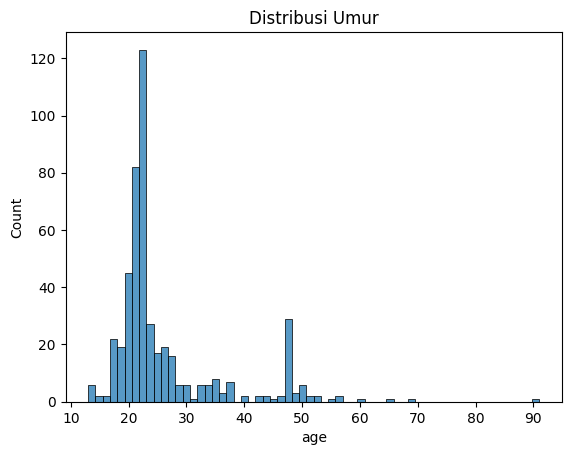

C:\Users\akhda\AppData\Local\Temp\ipykernel_25064\1079904824.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


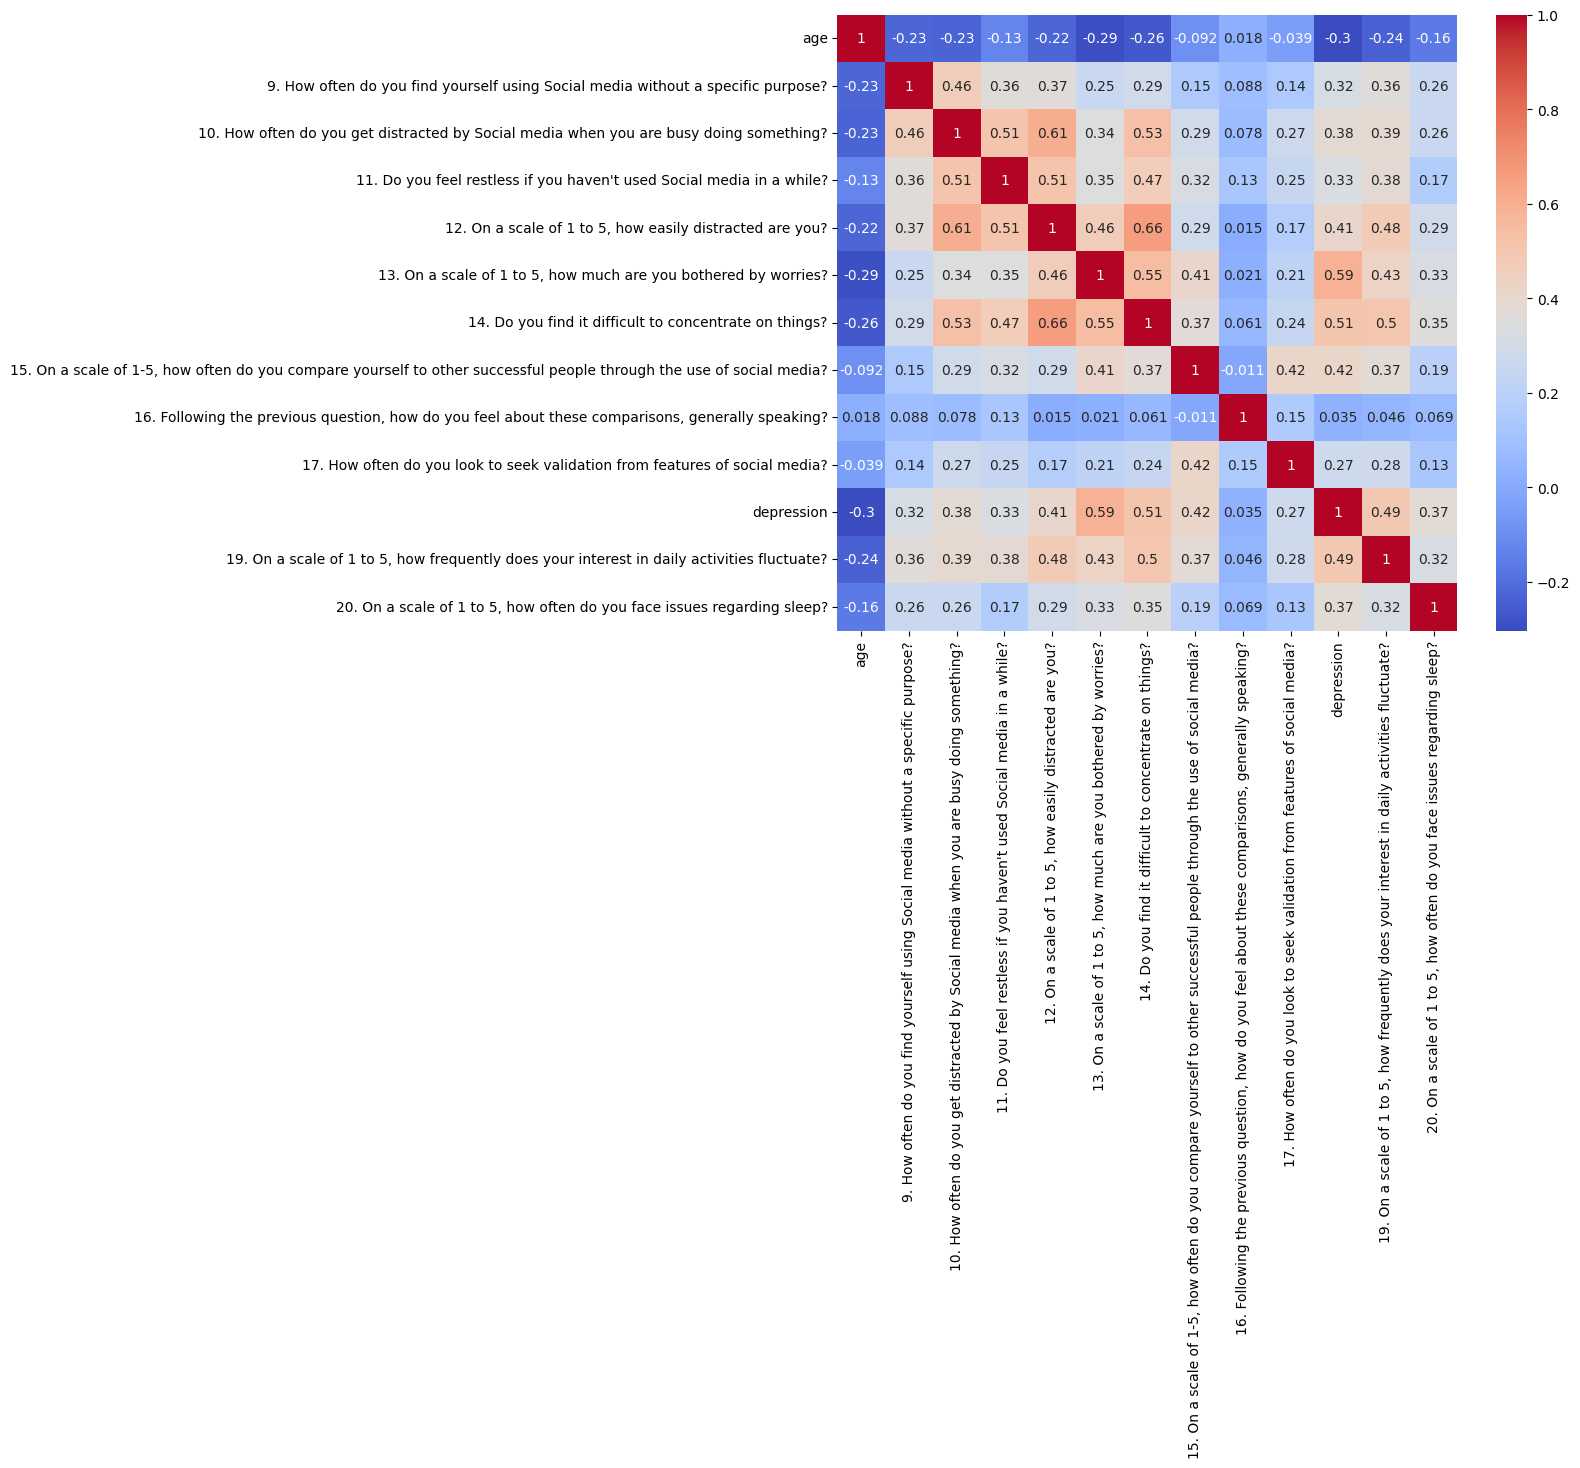

In [9]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

df.rename(columns={
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '18. How often do you feel depressed or down?': 'depression'
}, inplace=True)


# visualisasi distribusi
sns.histplot(df['age'])
plt.title('Distribusi Umur')
plt.show()

# korelasi heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Preprocessing

In [26]:
le = LabelEncoder()
for col in ['gender', 'relationship_status']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# handle missing value
df.fillna(df.mean(), inplace=True)

# scale data (hanya numeric)
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)


C:\Users\akhda\AppData\Local\Temp\ipykernel_25064\2233641380.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


K-Means Clustering (Unsupervised)

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# cek apakah kolom ada biar gak error
if 'social_media_usage_hours' in df.columns and 'anxiety_level' in df.columns:
    sns.scatterplot(x=df['social_media_usage_hours'], y=df['anxiety_level'], hue=df['cluster'], palette='viridis')
    plt.title('Cluster Plot Media Sosial vs Kecemasan')
    plt.show()
else:
    print('❌ Kolom social_media_usage_hours atau anxiety_level tidak ditemukan')


❌ Kolom social_media_usage_hours atau anxiety_level tidak ditemukan


Random Forest (Supervised)

In [29]:
target = 'depression' if 'depression' in df.columns else 'sleep_disorder'
if target not in df.columns:
    raise ValueError('❌ Kolom depression atau sleep_disorder tidak ditemukan di dataset')

features = df.drop([target, 'cluster'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluasi
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ValueError: could not convert string to float: '4/22/2022 2:35:48'